In [5]:
from PIL import Image
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import os

也许在进行边缘分割前设置几个阈值进行细胞分类，比如150

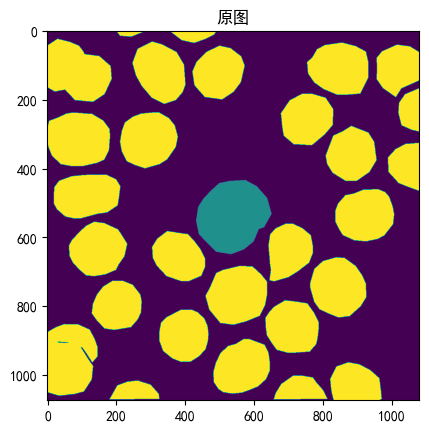

In [6]:
plt.rcParams['font.sans-serif']=['SimHei']#plt显示中文
path = '../cellimgs'
file = os.listdir(path)
imgs=[]

root=r'data'
file = os.listdir(root)
for line in  file:
    imgs.append( np.array(Image.open((os.path.join(root, line,'label.png')))))

plt.title('原图') 
plt.imshow(imgs[0])

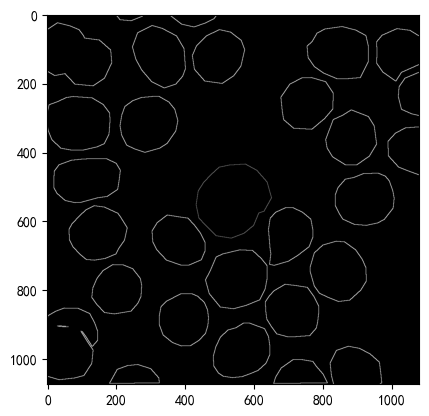

In [7]:
Sobel=[]
for grayImage in imgs:
    #Sobel算子
    x = cv2.Sobel(grayImage, cv2.CV_16S, 1, 0) #对x求一阶导
    y = cv2.Sobel(grayImage, cv2.CV_16S, 0, 1) #对y求一阶导
    absX = cv2.convertScaleAbs(x) 
    absY = cv2.convertScaleAbs(y) 
    Sobel.append(cv2.addWeighted(absX, 0.5, absY, 0.5, 0))
    
plt.imshow(Sobel[0], 'gray')

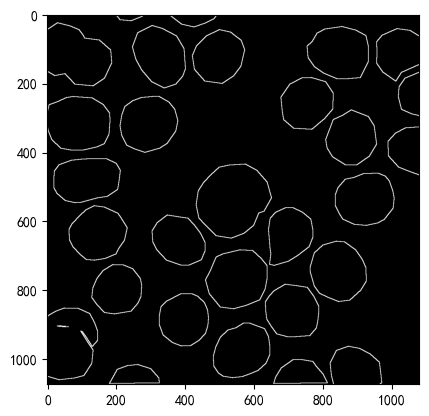

In [8]:
erzhi=[]
for i in Sobel:
    erzhi.append(np.where(i>0,255,0))

plt.imshow(erzhi[0], 'gray')

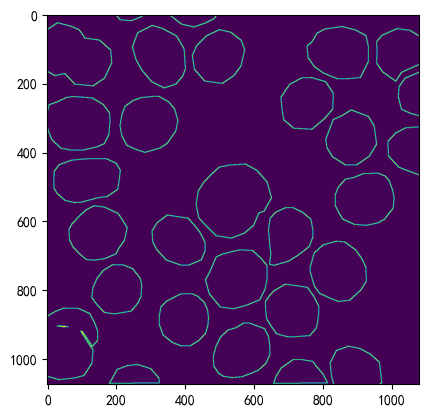

In [12]:
#对标签的边缘变成255
label=[]
for i,j in zip(imgs,erzhi):
    label.append(np.where(i>j,i,j))

plt.imshow(label[0])

In [10]:
for i,line in  enumerate(file):
    img=Image.fromarray(np.uint8(label[i]))
    img.save((os.path.join(root, line,'good.png')))